## 체스 말 구분하기

### [1] 데이터 불러오기

In [30]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau

In [31]:
# 각각의 데이터가 들어간 경로 설정
dirname = './data/'
dir_chess_folder = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folder]

In [32]:
dirname

'./data/'

In [33]:
# # 각각의 디렉토리 형성
# os.mkdir('./data/chess')

# for path in dir_chess_folder :
#     dir_path = './data/chess/' + path
#     os.mkdir(dir_path)

In [34]:
# dirname_work = './data/'
# dir_work_chess = os.path.join(dirname_work, 'chess')

# dir_work_chess02 = dir_work_chess +'/'

# pawn_path_work = os.path.join(dir_work_chess02, 'pawn')
# rook_path_work = os.path.join(dir_work_chess02, 'rook')
# bishop_path_work = os.path.join(dir_work_chess02, 'bishop')
# knight_path_work = os.path.join(dir_work_chess02, 'knight')
# queen_path_work = os.path.join(dir_work_chess02, 'queen')
# king_path_work = os.path.join(dir_work_chess02, 'king')

In [35]:
# dir_chess_folders_work = os.listdir(dir_work_chess)
# dir_chess_paths_work = [os.path.join(dir_work_chess, path) for path in dir_chess_folders_work]

#### [2] EDA

In [36]:
# 각각의 이미지가 얼마나 있나 확인
chess_dic = {}
for path in dir_chess_paths :
    head, tail = os.path.split(path)
    chess_dic[tail] = len(os.listdir(path))

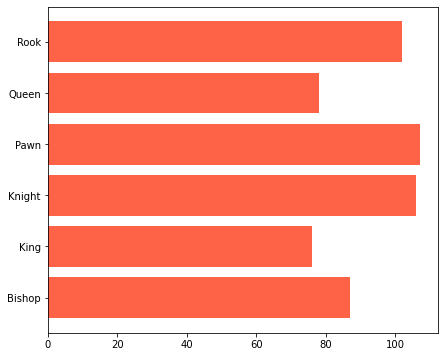

In [37]:
plt.figure(figsize=(7,6))
plt.barh(range(len(chess_dic)), list(chess_dic.values()), color = 'tomato')
plt.yticks(range(len(chess_dic)), list(chess_dic.keys()))
plt.show()

***우선은 이 비율 그대로 하고 나중에는 비율을 맞춰서 해보자**

In [38]:
# 이미지 확인
def plot_imgs(item_dir, title= " ", num_imgs = 4, cmap = 'viridis') :
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]
    plt.figure(figsize=(15,15))
    for idx, img_path in enumerate(item_files) :
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap = cmap)

        plt.tight_layout()

In [39]:
# for path in dir_chess_paths:
#     head, tail = os.path.split(path)
#     plot_imgs(path, tail, 8)

***이미지의 대부분이 컬러고 사이즈가 제각각임**  
***우선은 이미지 크기만 맞춰서 하고 나중에 흑백으로 바꿔서 해보자**

In [40]:
# 크기는 64, 64으로 고정
img_size_h, img_size_w = 64, 64
input_shape = (img_size_h, img_size_w, 3)

In [41]:
## CNN 모델의 성능을 높이면서 오버피팅을 극복할 수 있게 학습 데이터를 늘려주는
# ImageDataGenerateor

train_datagen = ImageDataGenerator(rescale=1./255,
validation_split=0.3,
rotation_range = 90,
width_shift_range = 0.6,
shear_range = 3,
zoom_range = 50,
horizontal_flip = True,
vertical_flip = True)

In [42]:
batch_size = 16
train_generator = train_datagen.flow_from_directory(
    dirname,
    target_size=(img_size_h, img_size_w),
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    dirname,
    target_size=(img_size_h, img_size_w),
    color_mode = 'rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


#### [3] 모델 생성

In [50]:
# 모델 생성
model = Sequential([Conv2D(16, (5,5), input_shape = input_shape, padding='same', activation ='relu'),
MaxPool2D((2,2)),
Flatten(),
Dense(128, activation='relu'),
Dense(6, activation='softmax')]
)

In [51]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

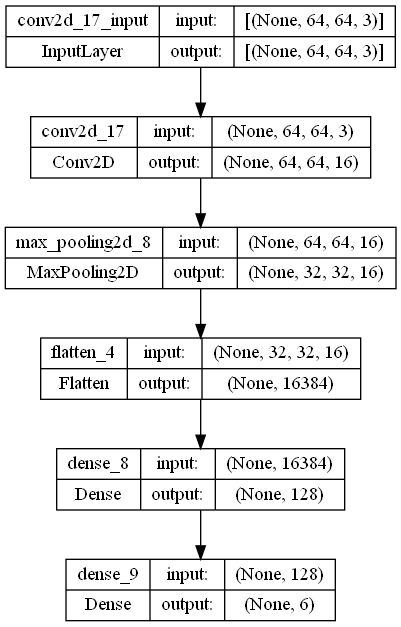

In [52]:
# 모델 확인
plot_model(model, show_shapes = True)

#### [4] 모델 학습

In [53]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
patience=2,
verbose=1,
factor=0.5,
min_lr = 0.005)
    
callback = [learning_rate_reduction]

In [54]:
history = model.fit_generator(
    train_generator,
    epochs=500,
    validation_data=validation_generator,
    callbacks = callback
    )

C:\Users\LJH\AppData\Local\Temp\ipykernel_2060\1568147520.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/500
25/25 [==============================] - 8s 319ms/step - loss: 2.0468 - accuracy: 0.1928 - val_loss: 1.7939 - val_accuracy: 0.1914 - lr: 0.0010
Epoch 2/500
25/25 [==============================] - 7s 294ms/step - loss: 1.7901 - accuracy: 0.1902 - val_loss: 1.7929 - val_accuracy: 0.1914 - lr: 0.0010
Epoch 3/500
25/25 [==============================] - 8s 306ms/step - loss: 1.7843 - accuracy: 0.1799 - val_loss: 1.7781 - val_accuracy: 0.1914 - lr: 0.0010
Epoch 4/500
25/25 [==============================] - 8s 312ms/step - loss: 1.7788 - accuracy: 0.2134 - val_loss: 1.7898 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 5/500
25/25 [==============================] - 8s 315ms/step - loss: 1.7834 - accuracy: 0.1851 - val_loss: 1.7914 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 6/500
25/25 [==============================] - 8s 314ms/step - loss: 1.7737 - accuracy: 0.2159 - val_loss: 1.7934 - val_accuracy: 0.1790 - lr: 0.0010
Epoch 7/500
25/25 [==============================] - 8s 319ms/st

KeyboardInterrupt: 